In [1]:
import torch
import torch.nn as nn
import torch.nn.utils.prune as prune
from functions.train_test import train, test,train_kd
from functions.data_loader import get_data_loader,load_checkpoint
from models.vit import ViT 
from functions.helpers import count_parameters


In [2]:
torch.manual_seed(42)

In [3]:
train_loader, test_loader = get_data_loader(
    80, 2, "datasets/cifar-100/cifar-100-python", download=True
)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
teacher_model = ViT(
    image_size=32,
    patch_size=4,
    num_classes=100,
    dim=64,
    depth=4, #6
    heads=8, #6
    mlp_dim=256,
    dropout=0.1,
    feature_distill=False
).to("cuda")

teacher_save_path = "save_model/cifar-100/vit_base"
teacher_load_path = f"{teacher_save_path}/best_model.pt"



student_kd = ViT(
    image_size=32,
    patch_size=4,
    num_classes=100,
    dim=64,
    depth=3,
    heads=6,
    mlp_dim=256,
    dropout=0.1,
    feature_distill=False

).to("cuda")
student_kd_save_path = "save_model/cifar-100/vit_student_kd"
student_kd_load_path = f"{student_kd_save_path}/best_model.pt"



In [ ]:
train(
    teacher_model,
    train_loader,
    test_loader,
    epochs=300,
    learning_rate=0.001,
    device='cuda',
    weight_decay=0.0005,
    # save_path=teacher_save_path,
)

In [ ]:
load_checkpoint(teacher_model,teacher_load_path)
test(teacher_model,test_loader,'cuda')
# load_checkpoint(student_kd,teacher_load_path)
# test(student_kd,test_loader,'cuda')

In [ ]:
student_featurekd_save_path='save_model/cifar-100/vit_featurekd'

Student base

In [ ]:
student_base = ViT(
    image_size=32,
    patch_size=4,
    num_classes=100,
    dim=64,
    depth=3,
    heads=6,
    mlp_dim=256,
    dropout=0.1,
    feature_distill=False

).to("cuda")
student_base_save_path = "save_model/cifar-100/vit_student_base"

In [ ]:
train(
    student_base,
    train_loader,
    test_loader,
    epochs=300,
    learning_rate=0.001,
    device='cuda',
    weight_decay=0.0005,
    # save_path=student_base_save_path,
)

Response based kd


In [ ]:

train_kd(
    student_kd,
    teacher_model,
    train_loader,
    test_loader,
    T=4,
    alpha=0.2,
    epochs=300,
    learning_rate=0.001,
    device='cuda',
    weight_decay=0.0005,
    distill_mode='response',
    # save_path=student_kd_save_path,
    load_path_teacher=teacher_load_path,
)

Feature kd


In [4]:
feature_student_kd = ViT(
    image_size=32,
    patch_size=4,
    num_classes=100,
    dim=64,
    depth=3,
    heads=6,
    mlp_dim=256,
    dropout=0.1,
    feature_distill=True

).to("cuda")
feature_student_kd_save_path = "save_model/cifar-100/vit_student_feature_kd"
feature_student_kd_load_path = f"{feature_student_kd_save_path}/best_model.pt"

teacher_model = ViT(
    image_size=32,
    patch_size=4,
    num_classes=100,
    dim=64,
    depth=4,
    heads=8,
    mlp_dim=256,
    dropout=0.1,
    feature_distill=True
).to("cuda")

teacher_save_path = "save_model/cifar-100/vit_base"
teacher_load_path = f"{teacher_save_path}/best_model.pt"

Epoch 1/300, Loss: 3.496587650680542
Current Learning Rate: 0.000999972584682756
accuracy: 6.25%
Test Accuracy: 10.20%
max_test_accuracy : 10.2
Epoch 2/300, Loss: 3.0702106922149657
Current Learning Rate: 0.0009998903417374227
accuracy: 11.25%
Test Accuracy: 14.92%
max_test_accuracy : 14.92
Epoch 3/300, Loss: 2.8836375312805176
Current Learning Rate: 0.0009997532801828658
accuracy: 20.0%
Test Accuracy: 18.66%
max_test_accuracy : 18.66
Epoch 4/300, Loss: 2.7672174503326414
Current Learning Rate: 0.0009995614150494292
accuracy: 15.0%
Test Accuracy: 20.41%
max_test_accuracy : 20.41
Epoch 5/300, Loss: 2.6821339767456056
Current Learning Rate: 0.000999314767377287
accuracy: 20.0%
Test Accuracy: 22.31%
max_test_accuracy : 22.31
Epoch 6/300, Loss: 2.6143292999267578
Current Learning Rate: 0.0009990133642141358
accuracy: 25.0%
Test Accuracy: 24.08%
max_test_accuracy : 24.08
Epoch 7/300, Loss: 2.5544990337371827
Current Learning Rate: 0.000998657238612229
accuracy: 38.75%
Test Accuracy: 24.60%


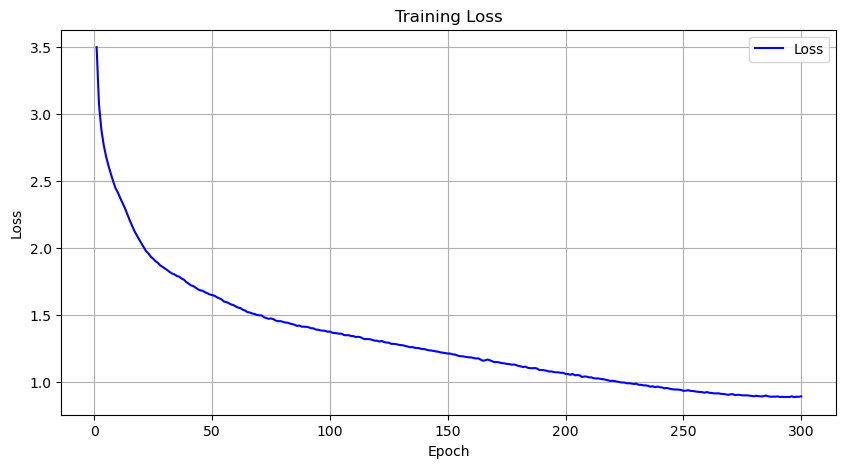

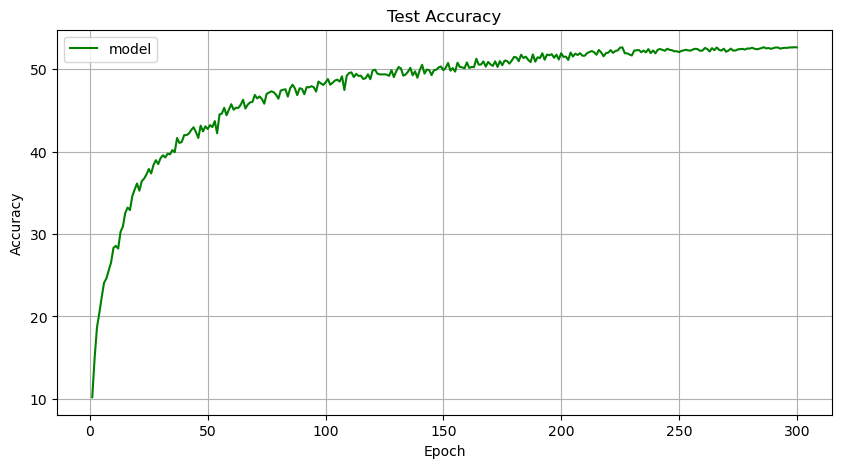

In [5]:
train_kd(
    feature_student_kd,
    teacher_model,
    train_loader,
    test_loader,
    T=4,
    alpha=0.2,
    epochs=300,
    learning_rate=0.001,
    device='cuda',
    weight_decay=0.0005,
    distill_mode='feature',
    # save_path=feature_student_kd_save_path,
    load_path_teacher=teacher_load_path,
)

Combined kd

In [ ]:
print(f"Total number of parameters: {count_parameters(student_kd)}")

Epoch 1/300, Loss: 5.187904862976074
Current Learning Rate: 0.000999972584682756
accuracy: 2.5%
Test Accuracy: 11.02%
max_test_accuracy : 11.02
Epoch 2/300, Loss: 4.4977551895141605
Current Learning Rate: 0.0009998903417374227
accuracy: 13.75%
Test Accuracy: 16.53%
max_test_accuracy : 16.53
Epoch 3/300, Loss: 4.212427919387817
Current Learning Rate: 0.0009997532801828658
accuracy: 21.25%
Test Accuracy: 19.16%
max_test_accuracy : 19.16
Epoch 4/300, Loss: 4.04833522605896
Current Learning Rate: 0.0009995614150494292
accuracy: 20.0%
Test Accuracy: 20.31%
max_test_accuracy : 20.31
Epoch 5/300, Loss: 3.9188418552398683
Current Learning Rate: 0.000999314767377287
accuracy: 16.25%
Test Accuracy: 22.49%
max_test_accuracy : 22.49
Epoch 6/300, Loss: 3.8076660388946535
Current Learning Rate: 0.0009990133642141358
accuracy: 23.75%
Test Accuracy: 23.78%
max_test_accuracy : 23.78
Epoch 7/300, Loss: 3.7128304065704345
Current Learning Rate: 0.000998657238612229
accuracy: 25.0%
Test Accuracy: 26.53%
m

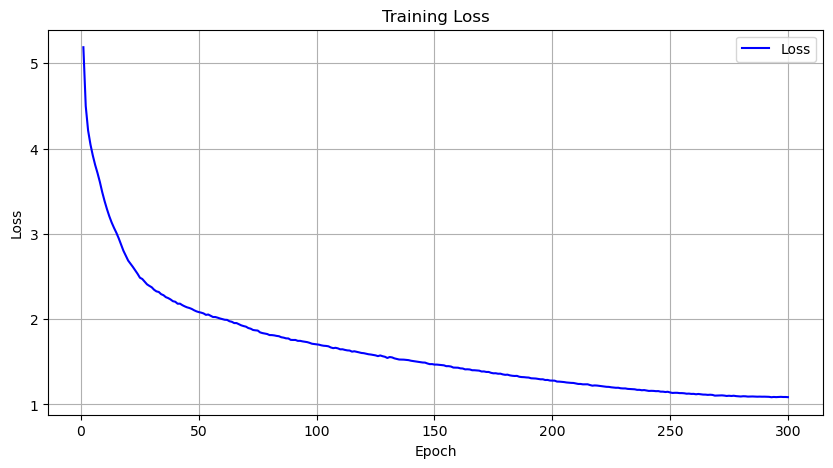

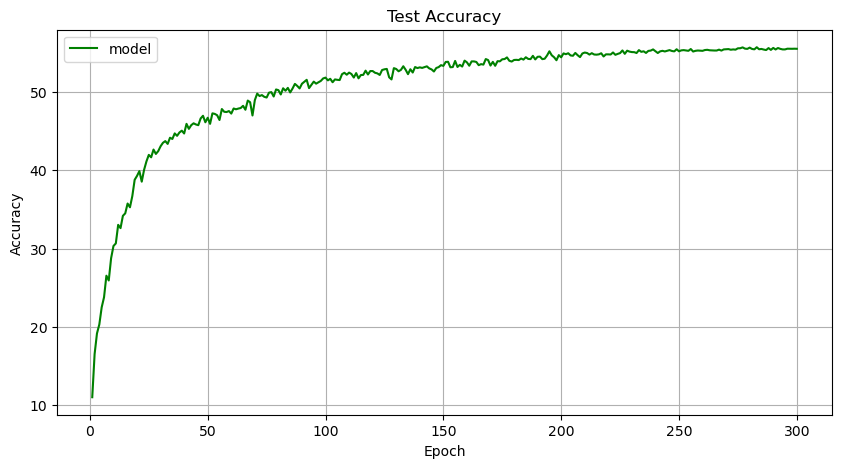

In [5]:
student_combined_kd = ViT(
    image_size=32,
    patch_size=4,
    num_classes=100,
    dim=64,
    depth=3,
    heads=6,
    mlp_dim=256,
    dropout=0.1,
    feature_distill=True
).to("cuda")

student_combined_kd_save_path = "save_model/cifar-100/vit_student_combined_kd2"

train_kd(
    student_combined_kd,
    teacher_model,
    train_loader,
    test_loader,
    T=4,
    alpha=0.15,
    beta=0.15,
    epochs=300,
    learning_rate=0.001,
    device='cuda',
    weight_decay=0.0005,
    distill_mode='combined',
    # save_path=student_combined_kd_save_path,
    load_path_teacher=teacher_load_path,
)

In [ ]:
load_checkpoint(student_kd,f"{student_kdsoft_save_path}/best_model.pt")

In [ ]:
test(student_kd,test_loader,'cuda')

In [ ]:
pruning_method = prune.L1Unstructured

In [ ]:
for name, module in teacher_model.named_modules():
    if isinstance(module, nn.Linear):
        prune.ln_structured(module, name='weight', amount=0.9, n=1, dim=0)
        print(module)


In [ ]:
teacher_model

In [ ]:
for name, layer in teacher_model.named_children():
    print(name)

In [ ]:
module = teacher_model.transformer.layers[0]

In [ ]:
for name, param in teacher_model.named_parameters():
    if "bias" in name:
        param= nn.Parameter(torch.sparse.FloatTensor(param.shape).to('cuda'))
        print(param)
    # else:
    #     print(param)


In [ ]:
for name, module in teacher_model.named_modules():
    print(module.transformer.layers[0][0].fn.to_qkv.weight)

In [ ]:
module

In [ ]:
attention = module[0].fn

In [ ]:
print(list(attention.named_parameters()))

In [ ]:
linear_layer = attention.to_qkv

In [ ]:
linear_layer

In [ ]:
prune.random_unstructured(linear_layer, name="weight", amount=0.3)

In [ ]:
teacher_model.transformer.layers[0][0].fn.to_qkv.weight